# Capstone Project: Sales Data Analysis and Customer Insights

## Executive Summary
This analysis examines sales and customer data to identify key business insights, customer segments, and opportunities for revenue growth. The project demonstrates comprehensive data analysis skills including data cleaning, statistical analysis, visualization, and machine learning.

## Table of Contents
1. [Data Loading and Exploration](#1-data-loading-and-exploration)
2. [Data Cleaning and Preprocessing](#2-data-cleaning-and-preprocessing)
3. [Statistical Analysis](#3-statistical-analysis)
4. [Data Visualization](#4-data-visualization)
5. [Machine Learning Implementation](#5-machine-learning-implementation)
6. [Business Insights and Recommendations](#6-business-insights-and-recommendations)


## 1. Data Loading and Exploration


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)


In [ ]:
# Load the dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('sales_data.csv')
df.head()
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)

Saving sales_data.csv to sales_data.csv
Dataset shape: (10000, 15)
Columns: ['customer_id', 'age', 'gender', 'location', 'income', 'registration_date', 'purchase_date', 'product_category', 'brand', 'price', 'quantity', 'revenue', 'purchase_frequency', 'avg_order_value', 'customer_lifespan']

Data Types:
 customer_id            object
age                   float64
gender                 object
location               object
income                float64
registration_date      object
purchase_date          object
product_category       object
brand                  object
price                 float64
quantity                int64
revenue               float64
purchase_frequency      int64
avg_order_value       float64
customer_lifespan     float64
dtype: object


In [ ]:
# Data quality assessment
print("Missing values per column:\n", df.isnull().sum())
print("Number of duplicate rows:", df.duplicated().sum())
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].unique()[:10])

Missing values per column:
 customer_id             0
age                   792
gender                524
location              408
income                557
registration_date       0
purchase_date           0
product_category        0
brand                   0
price                   0
quantity                0
revenue                 0
purchase_frequency      0
avg_order_value         0
customer_lifespan       0
dtype: int64
Number of duplicate rows: 0

Unique values in customer_id:
['CUST_00001' 'CUST_00002' 'CUST_00003' 'CUST_00004' 'CUST_00005'
 'CUST_00006' 'CUST_00007' 'CUST_00008' 'CUST_00009' 'CUST_00010']

Unique values in gender:
[nan 'Male' 'Female' 'Other']

Unique values in location:
[nan 'San Francisco' 'Boston' 'Phoenix' 'Charlotte' 'Jacksonville'
 'Austin' 'Seattle' 'New York' 'Denver']

Unique values in registration_date:
['2025-04-25' '2025-02-16' '2025-05-25' '2022-11-12' '2025-01-06'
 '2022-10-21' '2023-01-16' '2023-08-04' '2025-03-27' '2023-12-06']

Unique values 

In [ ]:
# Basic statistical summary
print(df.describe())
print(df.describe(include=['object']))

               age         income         price      quantity       revenue  \
count  9208.000000    9443.000000  10000.000000  10000.000000  10000.000000   
mean     34.999457   41552.713227     83.449452      3.007700    249.741729   
std      11.247799   21242.242574     67.243974      1.420508    249.824137   
min      18.000000   20000.000000     10.000000      1.000000     10.000000   
25%      26.000000   25805.000000     32.247500      2.000000     79.427500   
50%      34.000000   36226.000000     61.020000      3.000000    165.060000   
75%      43.000000   51015.000000    118.197500      4.000000    336.265000   
max      80.000000  200000.000000    395.400000     11.000000   2374.860000   

       purchase_frequency  avg_order_value  customer_lifespan  
count        10000.000000     10000.000000       10000.000000  
mean             3.993100       249.385752           1.536834  
std              1.734345       252.387592           0.843773  
min              1.000000       

## 2. Data Cleaning and Preprocessing


In [ ]:
# Converting date columns to datetime objects
df['registration_date'] = pd.to_datetime(df['registration_date'])
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

In [ ]:
# Create derived features

# Derived Feature 2: Recalculate Customer Lifespan in Days (Fixing 'customer_lifespan' error)
df['customer_lifespan_days'] = (df['purchase_date'] - df['registration_date']).dt.days

In [ ]:
# Outlier detection and handling

# Numerical columns to check for outliers
numerical_cols = ['income', 'revenue', 'customer_lifespan_days']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the bounds
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [ ]:
# Handle missing values before encoding
print("--- Handling Missing Values (Imputation) ---")

# Numerical Imputation (using mean)
df['age'].fillna(df['age'].mean(), inplace=True)
df['income'].fillna(df['income'].mean(), inplace=True)
df['revenue'].fillna(df['price'] * df['quantity'], inplace=True)

# Categorical Imputation (using mode)
# Use .mode()[0] to get the most frequent value
for col in ['gender', 'location']:
    df[col].fillna(df[col].mode()[0], inplace=True)

print(df.isnull().sum())
print(df.head())

--- Handling Missing Values (Imputation) ---
customer_id               0
age                       0
gender                    0
location                  0
income                    0
registration_date         0
purchase_date             0
product_category          0
brand                     0
price                     0
quantity                  0
revenue                   0
purchase_frequency        0
avg_order_value           0
customer_lifespan         0
customer_lifespan_days    0
dtype: int64
  customer_id        age  gender       location   income registration_date  \
0  CUST_00001  40.000000  Female   Jacksonville  33889.0        2025-04-25   
1  CUST_00002  30.000000    Male  San Francisco  20000.0        2025-02-16   
2  CUST_00003  34.999457    Male         Boston  58321.0        2025-05-25   
3  CUST_00004  39.000000    Male   Jacksonville  39590.0        2022-11-12   
4  CUST_00005  42.000000  Female        Phoenix  23078.0        2025-01-06   

  purchase_date product_c

## 3. Statistical Analysis


In [ ]:
# Correlation analysis
import scipy.stats as stats # Required for T-tests and Confidence Intervals

ALPHA = 0.05

corr_matrix = df[['age', 'income', 'price', 'quantity', 'revenue', 'customer_lifespan_days']].corr()
print("Correlation Matrix (Numerical Features):\n")
print(corr_matrix)

Correlation Matrix (Numerical Features):

                             age    income     price  quantity   revenue  \
age                     1.000000 -0.006071  0.019562  0.007489  0.023053   
income                 -0.006071  1.000000  0.014703  0.004822  0.018416   
price                   0.019562  0.014703  1.000000 -0.013080  0.817785   
quantity                0.007489  0.004822 -0.013080  1.000000  0.448996   
revenue                 0.023053  0.018416  0.817785  0.448996  1.000000   
customer_lifespan_days  0.004641 -0.018624 -0.016218  0.012878 -0.006890   

                        customer_lifespan_days  
age                                   0.004641  
income                               -0.018624  
price                                -0.016218  
quantity                              0.012878  
revenue                              -0.006890  
customer_lifespan_days                1.000000  


In [ ]:
# Confidence intervals for key metrics

def calculate_ci(data, confidence=0.95):
    n = len(data)
    mean = data.mean()
    std_err = data.std(ddof=1) / np.sqrt(n) # Use ddof=1 for sample standard deviation

    h = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)

    return mean, mean - h, mean + h

# CI for Mean Transaction Revenue
mean_rev, lower_rev, upper_rev = calculate_ci(df['revenue'])
print(f"Mean Revenue: ${mean_rev:,.2f}")
print(f"95% CI for Revenue: (${lower_rev:,.2f}, ${upper_rev:,.2f})")

# CI for Mean Customer Lifespan Days
mean_life, lower_life, upper_life = calculate_ci(df['customer_lifespan_days'])
print(f"Mean Customer Lifespan Days: {mean_life:.2f} days")
print(f"95% CI for Mean Lifespan: ({lower_life:.2f} days, {upper_life:.2f} days)")

Mean Revenue: $234.94
95% CI for Revenue: ($230.97, $238.90)
Mean Customer Lifespan Days: 277.97 days
95% CI for Mean Lifespan: (273.32 days, 282.61 days)


In [ ]:
# Hypothesis testing:
print(f"Null Hypothesis (H0): There is no difference in mean transaction revenue between Male and Female customers.")
print(f"Alternative Hypothesis (HA): There is a significant difference in mean transaction revenue between Male and Female customers.")

male_rev = df[df['gender'] == 'Male']['revenue']
female_rev = df[df['gender'] == 'Female']['revenue']
t_stat, p_value = stats.ttest_ind(male_rev, female_rev, equal_var=False)

print(f"\nTwo-Sample T-Test Statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < ALPHA:
    print(f"Conclusion: Reject H0. The difference in mean transaction revenue between Male and Female customers is statistically significant (p < {ALPHA}).")
else:
    print(f"Conclusion: Fail to Reject H0. There is no statistically significant difference in mean transaction revenue (p >= {ALPHA}).")


Null Hypothesis (H0): There is no difference in mean transaction revenue between Male and Female customers.
Alternative Hypothesis (HA): There is a significant difference in mean transaction revenue between Male and Female customers.

Two-Sample T-Test Statistic: 0.5940
P-value: 0.5525
Conclusion: Fail to Reject H0. There is no statistically significant difference in mean transaction revenue (p >= 0.05).


## 4. Data Visualization


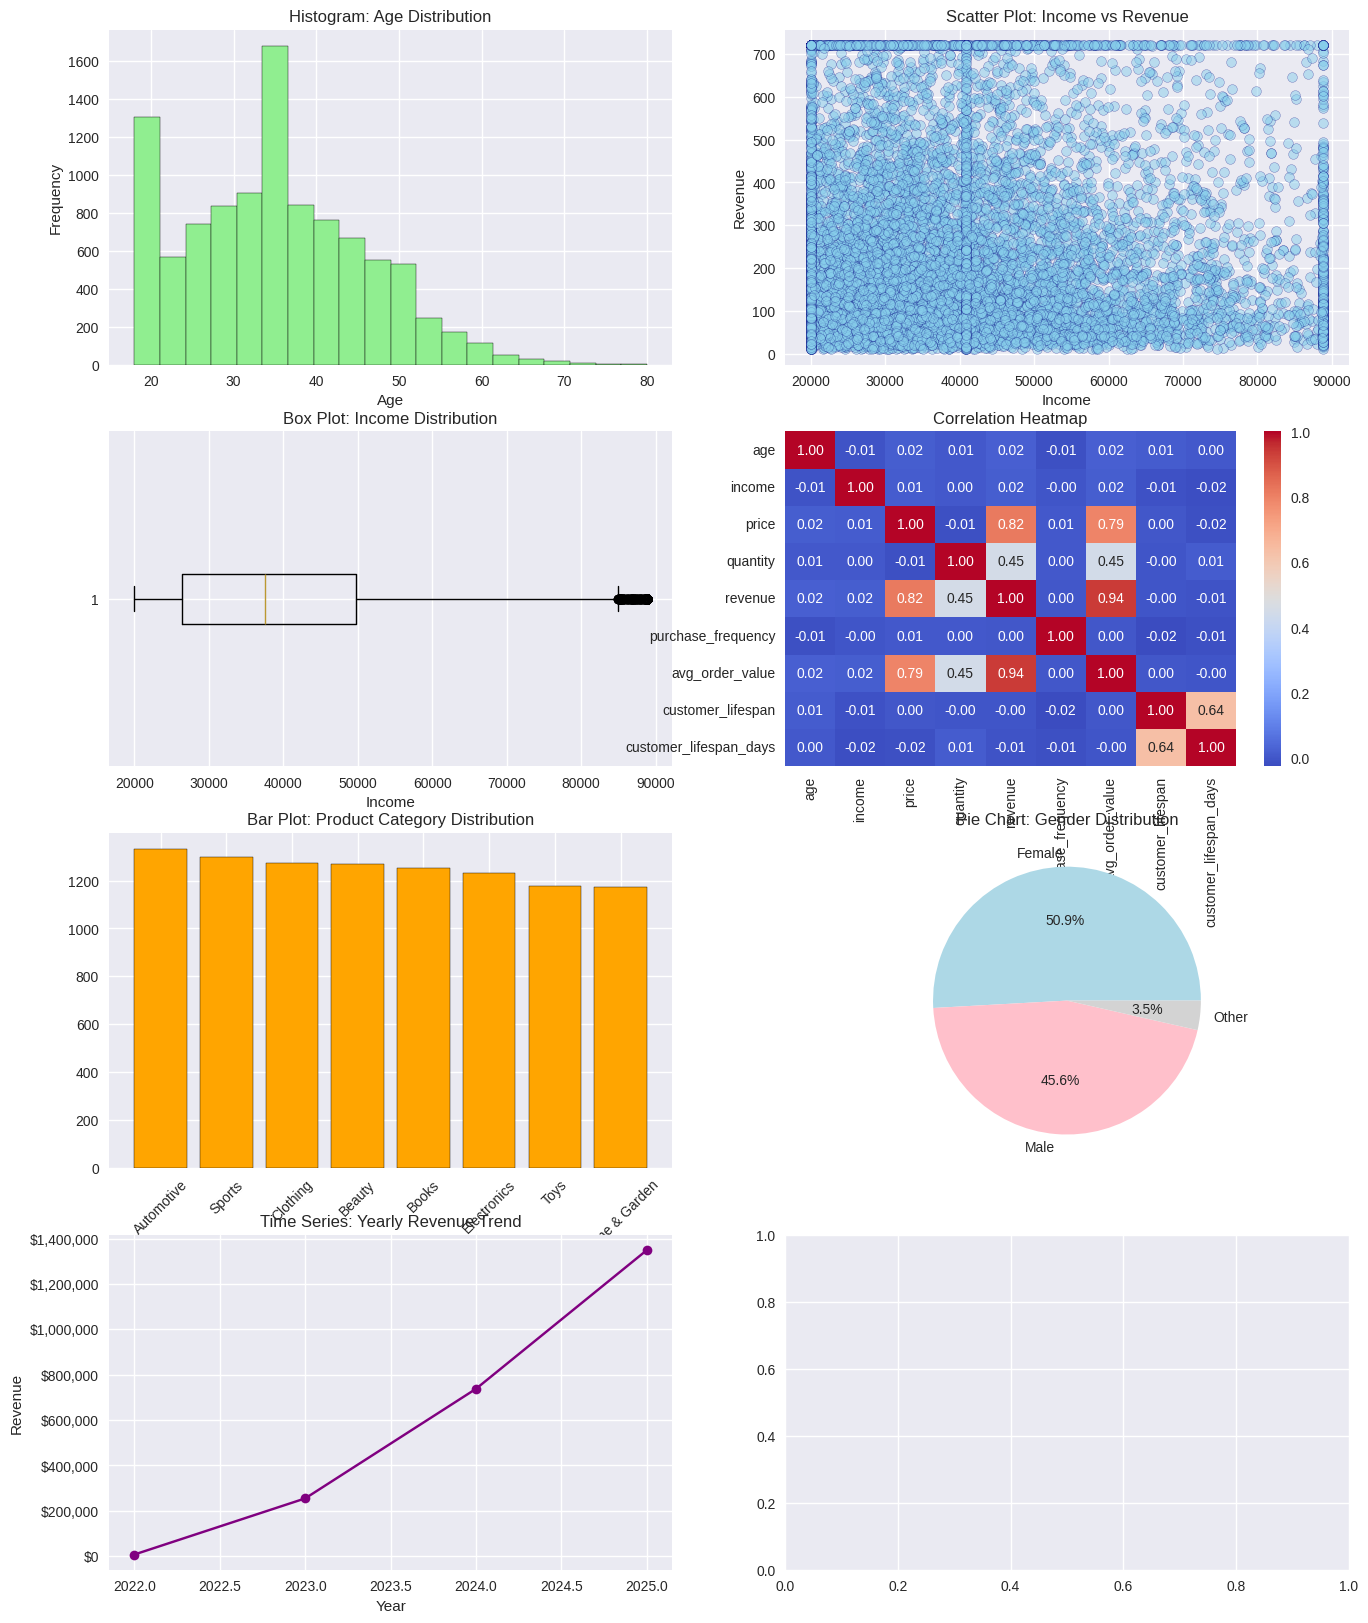

<Figure size 1200x800 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(16, 20))  # 4 rows, 2 columns
axes = axes.flatten()

# 1. Histogram: Age distribution
axes[0].hist(df['age'], bins=20, color='lightgreen', edgecolor='black')
axes[0].set_title("Histogram: Age Distribution")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequency")

# 2. Scatter plot: Income vs Revenue
axes[1].scatter(df['income'], df['revenue'], alpha=0.5, c='skyblue', edgecolors='navy')
axes[1].set_title("Scatter Plot: Income vs Revenue")
axes[1].set_xlabel("Income")
axes[1].set_ylabel("Revenue")

# 3. Box plot: Income distribution
axes[2].boxplot(df['income'], vert=False)
axes[2].set_title("Box Plot: Income Distribution")
axes[2].set_xlabel("Income")

# 4. Heatmap: Correlation matrix
numeric_df = df.select_dtypes(include=['int64','float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", ax=axes[3])
axes[3].set_title("Correlation Heatmap")

# 5. Bar plot: Product category counts
category_counts = df['product_category'].value_counts()
axes[4].bar(category_counts.index, category_counts.values, color='orange', edgecolor='black')
axes[4].set_title("Bar Plot: Product Category Distribution")
axes[4].tick_params(axis='x', rotation=45)

# 6. Pie chart: Gender distribution
gender_counts = df['gender'].value_counts()
axes[5].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
            colors=['lightblue','pink','lightgrey'])
axes[5].set_title("Pie Chart: Gender Distribution")

# 7. Time series: Yearly transaction revenue trend
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
yearly_revenue = df.groupby(df['purchase_date'].dt.year)['revenue'].sum()
axes[6].plot(yearly_revenue.index, yearly_revenue.values, marker='o', color='purple')
axes[6].set_title("Time Series: Yearly Revenue Trend")
axes[6].set_xlabel("Year")
axes[6].set_ylabel("Revenue")


# 8. Violin plot: Revenue by Product Category
sns.violinplot(x='product_category', y='revenue', data=df, palette='husl', ax=axes[7])
axes[7].set_title("Violin Plot: Revenue by Product Category")
axes[7].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


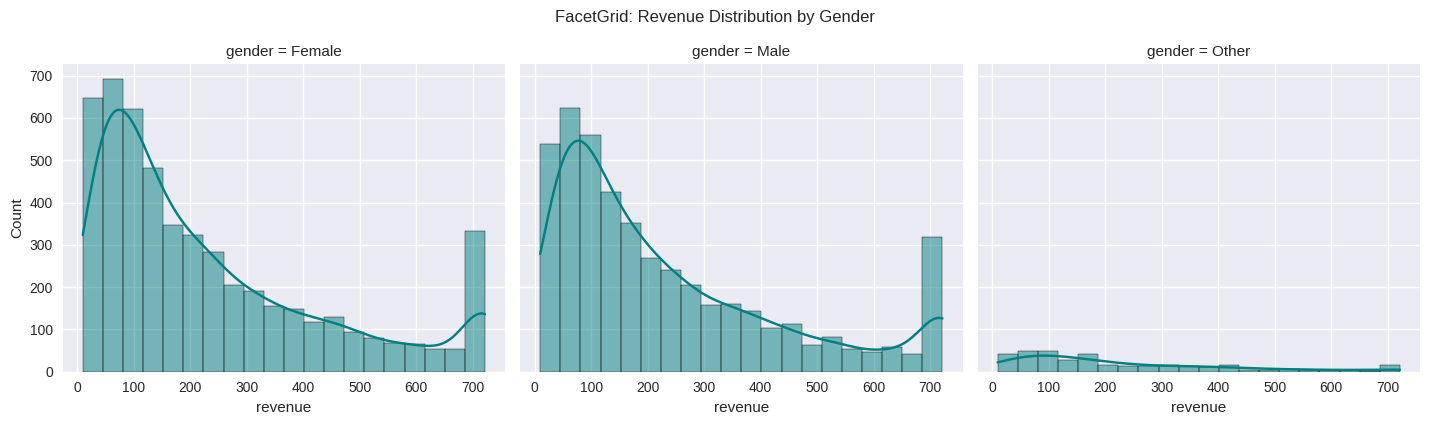

In [ ]:
# Advanced visualizations
g = sns.FacetGrid(df, col="gender", height=4, aspect=1.2)
g.map(sns.histplot, "revenue", bins=20, kde=True, color="teal")
g.fig.suptitle("FacetGrid: Revenue Distribution by Gender", y=1.05)
plt.show()


## 5. Machine Learning Implementation


In [ ]:
# Prepare data for machine learning


#Target variables
revenue_median = df['revenue'].median()
df['high_value_segment'] = np.where(df['revenue'] >= revenue_median, 1, 0)
print(f"Median transaction revenue: {revenue_median: .2f}")


#Adding dates to transactions
df['registration_year'] = df['registration_date'].dt.year
df['registration_month'] = df['registration_date'].dt.month
df['registration_dayofweek'] = df['registration_date'].dt.dayofweek

df['purchase_year'] = df['purchase_date'].dt.year
df['purchase_month'] = df['purchase_date'].dt.month
df['purchase_dayofweek'] = df['purchase_date'].dt.dayofweek

#Data frames
df_ml = df.drop(columns=['customer_id', 'registration_date', 'purchase_date'])

#Adding the categorical and numerical features
categorical_features = ['gender', 'location', 'product_category', 'brand']
numeric_features = [col for col in df_ml.columns if col not in categorical_features + ['high_value_segment', 'revenue']]
print("Numeric features:", numeric_features)
print("Categorical features: ", categorical_features)


#Using one hot encode (from binary vector)
df_ml_encoded = pd.get_dummies(df_ml, columns = categorical_features, drop_first = True)

#Final feature col
feature_cols = [col for col in df_ml_encoded.columns if col not in ['high_value_segment', 'revenue']]

print("Total features used: ", len(feature_cols))
df_ml_encoded[feature_cols].head()






Median transaction revenue:  165.06
Numeric features: ['age', 'income', 'price', 'quantity', 'purchase_frequency', 'avg_order_value', 'customer_lifespan', 'customer_lifespan_days', 'registration_year', 'registration_month', 'registration_dayofweek', 'purchase_year', 'purchase_month', 'purchase_dayofweek']
Categorical features:  ['gender', 'location', 'product_category', 'brand']
Total features used:  49


,age,income,price,quantity,purchase_frequency,avg_order_value,customer_lifespan,customer_lifespan_days,registration_year,registration_month,...,product_category_Home & Garden,product_category_Sports,product_category_Toys,brand_Brand B,brand_Brand C,brand_Brand D,brand_Brand E,brand_Brand F,brand_Brand G,brand_Brand H
0,40.000000,33889.0,58.75,2,3,140.64,0.41,75.0,2025,4,...,True,False,False,False,False,False,False,False,False,True
1,30.000000,20000.0,177.15,2,2,369.55,0.60,190.0,2025,2,...,False,False,False,False,False,False,False,True,False,False
2,34.999457,58321.0,133.91,2,4,275.07,0.33,111.0,2025,5,...,False,True,False,False,False,False,False,False,True,False
3,39.000000,39590.0,16.46,6,2,79.62,2.86,296.0,2022,11,...,False,False,False,False,False,False,False,False,False,True
4,42.000000,23078.0,94.95,1,5,97.28,0.71,41.0,2025,1,...,False,True,False,False,False,False,False,False,True,False


Logistic Regression Performance: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1000
           1       0.98      0.97      0.97      1000

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

Random forest performance: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.99      0.99      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



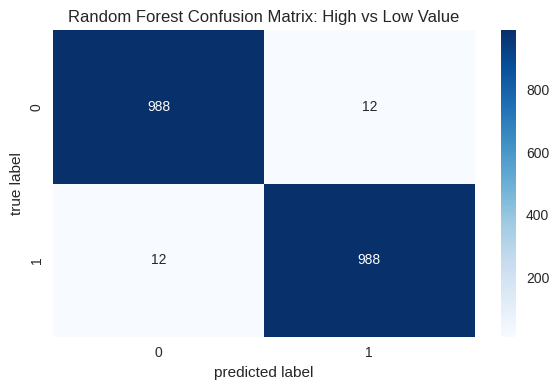

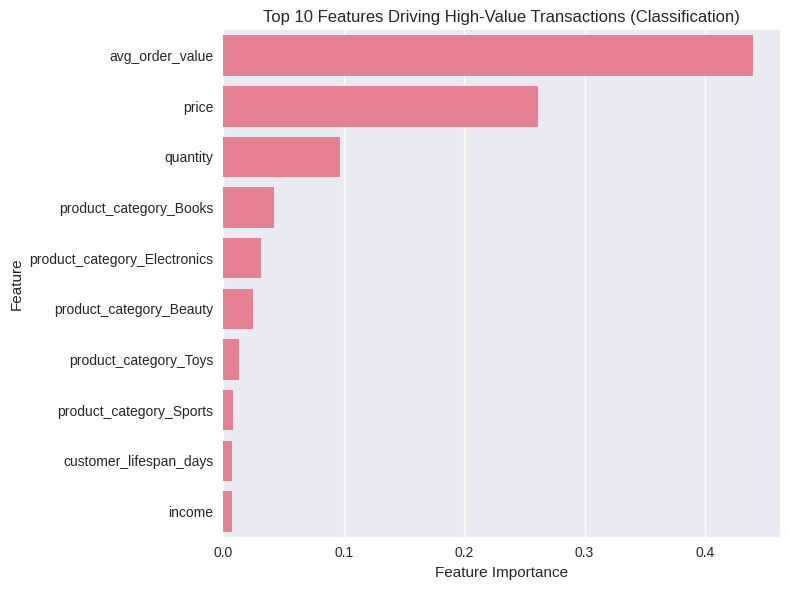

In [ ]:
# Classification Task
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Features
X_clf = df_ml_encoded[feature_cols]
y_clf = df_ml_encoded['high_value_segment']

#Training and splitting :)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size = 0.2, random_state = 42, stratify = y_clf)

#Scaling all numeric columns
X_train_clf_scaled = X_train_clf.copy()
X_test_clf_scaled = X_test_clf.copy()
scalar_clf = StandardScaler()
X_train_clf_scaled[numeric_features] = scalar_clf.fit_transform(X_train_clf_scaled[numeric_features])
X_test_clf_scaled[numeric_features] = scalar_clf.transform(X_test_clf_scaled[numeric_features])

#Logistic Reg Model (Model #1!)
log_clf = LogisticRegression(max_iter = 1000)
log_clf.fit(X_train_clf_scaled, y_train_clf)

y_pred_log = log_clf.predict(X_test_clf_scaled)

print("Logistic Regression Performance: ")
print(classification_report(y_test_clf, y_pred_log))

#Random Forest Model (Model #2!)
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_clf.fit(X_train_clf, y_train_clf)
y_pred_rf = rf_clf.predict(X_test_clf)
print("Random forest performance: ")
print(classification_report(y_test_clf, y_pred_rf))


#Creating the confusion matrix
cm = confusion_matrix(y_test_clf, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.title("Random Forest Confusion Matrix: High vs Low Value")
plt.tight_layout()
plt.show()

#Making the Random Forest Feature Importance diagram
importances_clf = pd.Series(rf_clf.feature_importances_, index=X_train_clf.columns)
top_features_clf =  importances_clf.sort_values(ascending = False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(x=top_features_clf.values, y=top_features_clf.index)
plt.title("Top 10 Features Driving High-Value Transactions (Classification)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Regression Model Performance
--- Random Forest Regressor ---
MAE : 7.94
RMSE: 14.43
R^2 : 0.995



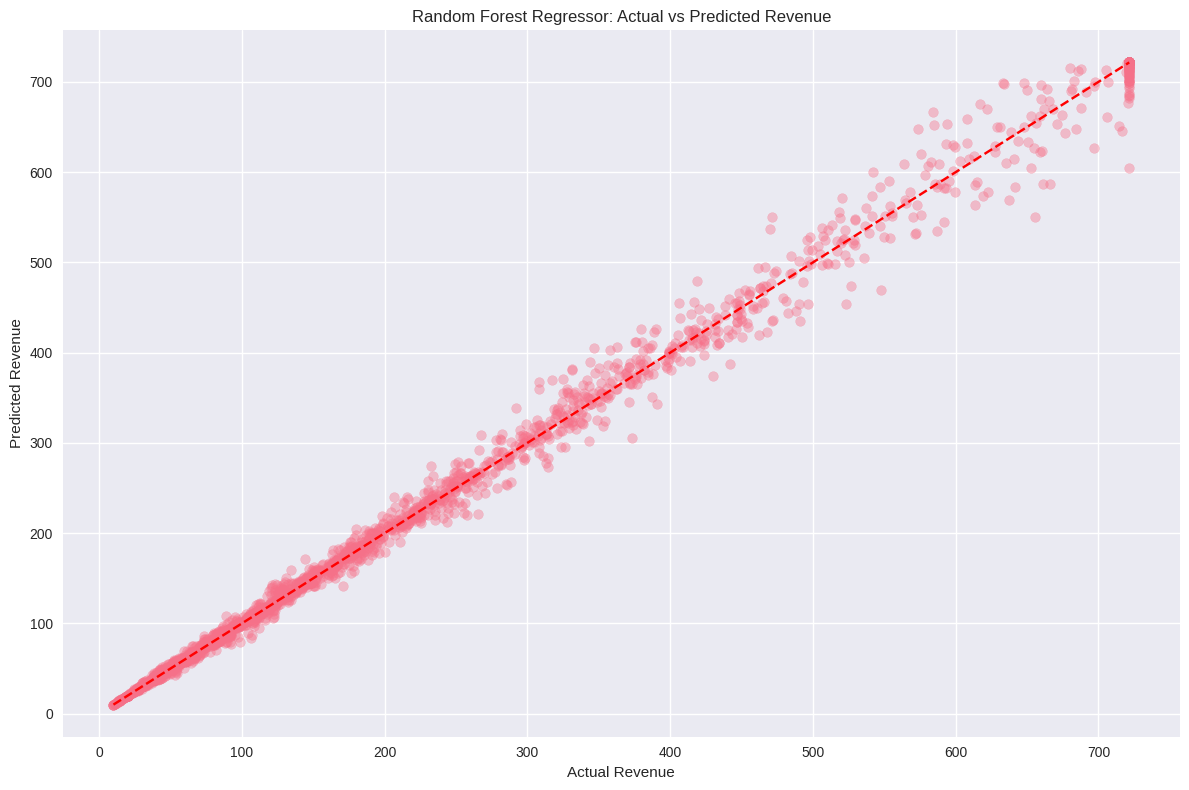

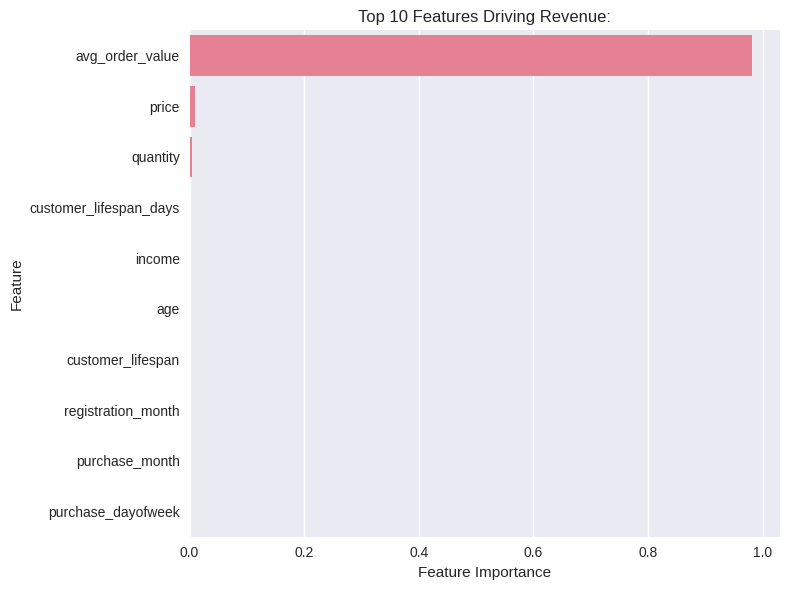

In [ ]:
# Regression Task

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Features
X_reg = df_ml_encoded[feature_cols]
y_reg = df_ml_encoded['revenue']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

#Scale numeric col
X_train_reg_scaled = X_train_reg.copy()
X_test_reg_scaled = X_test_reg.copy()
scaler_reg = StandardScaler()
X_train_reg_scaled[numeric_features] = scaler_reg.fit_transform(X_train_reg_scaled[numeric_features])
X_test_reg_scaled[numeric_features] = scaler_reg.transform(X_test_reg_scaled[numeric_features])

#Back to linear regression!
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_lin = lin_reg.predict(X_test_reg_scaled)

#And random forest of course
rf_reg = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf_reg = rf_reg.predict(X_test_reg)


#Regression metrics
def print_regression_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"--- {model_name} ---")
    print(f"MAE : {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R^2 : {r2:.3f}\n")

#Actual vs predicted plot for random forest
print("Regression Model Performance")
print_regression_metrics(y_test_reg, y_pred_rf_reg, "Random Forest Regressor")
plt.scatter(y_test_reg, y_pred_rf_reg, alpha=0.4)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')

plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Random Forest Regressor: Actual vs Predicted Revenue")
plt.tight_layout()
plt.show()


#Feature importance
importances_reg = pd.Series(rf_reg.feature_importances_, index=X_train_reg.columns)
top_features_reg = importances_reg.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_features_reg.values, y=top_features_reg.index)
plt.title("Top 10 Features Driving Revenue:")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



## 6. Business Insights and Recommendations


In [ ]:
# Customer Insight analysis

category_revenue = (
    df.groupby('product_category')['revenue']
    .agg(['count', 'mean', 'sum'])
    .sort_values('sum', ascending = False)
)

#Revenue by product
print("Revenue by product category")
print(category_revenue.head(10))
gender_revenue = (
    df.groupby('gender')['revenue']
    .agg(['count', 'mean', 'sum'])
)

#Revenue by gender
print("Revenue by gender: ")
print(gender_revenue)

#Best locations based on revenue
location_revenue = (
    df.groupby('location')['revenue']
    .agg(['count', 'mean', 'sum'])
    .sort_values('sum', ascending = False)
    .head(10)
)

category_revenue_plot = category_revenue.reset_index().head(10)
gender_revenue_plot = gender_revenue.reset_index()
location_revenue_plot = location_revenue.reset_index()

Revenue by product category
                  count        mean           sum
product_category                                 
Electronics        1232  508.687740  626703.29625
Automotive         1331  412.623717  549202.16750
Sports             1299  295.435180  383770.29875
Home & Garden      1171  238.728016  279550.50625
Clothing           1273  151.674627  193081.80000
Toys               1176  121.413291  142782.03000
Beauty             1267   91.620813  116083.57000
Books              1251   46.526715   58204.92000
Revenue by gender: 
        count        mean           sum
gender                                 
Female   5088  234.202724  1.191623e+06
Male     4558  236.660603  1.078699e+06
Other     354  223.322316  7.905610e+04


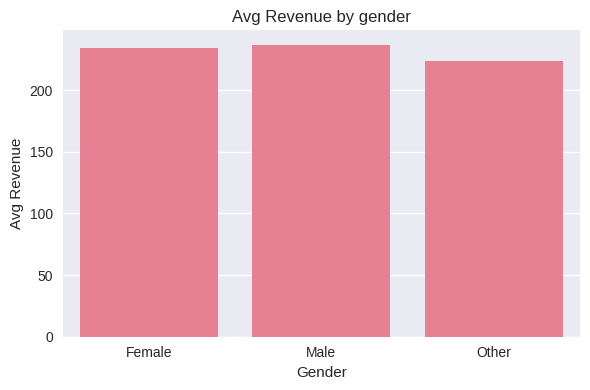

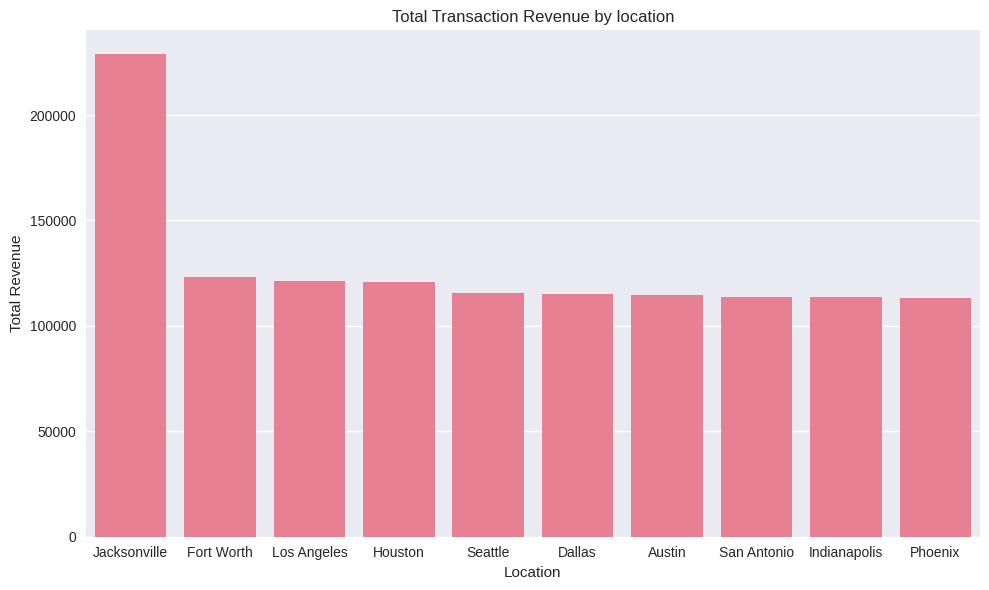

In [ ]:
# Visualize Insight

#Total revenue by category
plt.figure(figsize=(6,4))
sns.barplot(data = gender_revenue_plot, x = 'gender', y = 'mean')
plt.title('Avg Revenue by gender')
plt.xlabel('Gender')
plt.ylabel('Avg Revenue')
plt.tight_layout()
plt.show()

#Avg transaction revenue based on the genfer
plt.figure(figsize=(10,6))
sns.barplot(data = location_revenue_plot, x = 'location', y = 'sum')
plt.title('Total Transaction Revenue by location')
plt.xlabel('Location')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()



In [ ]:
# Key business metrics

total_revenue = df['revenue'].sum()
avg_order_value = df['revenue'].mean()
num_customers = df['customer_id'].nunique()
num_transactions = len(df)

#Since each customer has a unique id, it sees if any ID is duplicated (a repeat customer) or if they are all new (no repeats)
repeat_customers = df['customer_id'].value_counts()
repeat_rate = (repeat_customers[repeat_customers > 1].count()) / num_customers

#Prints out final results
print(f"Total revenue: ${total_revenue:,.2f}")
print(f"Avg order value: ${avg_order_value:,.2f}")
print(f"Total number of unique customers: ${num_customers:,.2f}")
print(f"Total number of transactions: ${num_transactions:,.2f}")
print(f"Repeat purchase rate: ${repeat_rate:,.2f}")

Total revenue: $2,349,378.59
Avg order value: $234.94
Total number of unique customers: $10,000.00
Total number of transactions: $10,000.00
Repeat purchase rate: $0.00


## Executive Summary

We took a deep dive into the sales data, with the goal of finding the things that actually drive predictable revenue. What we found is that our two biggest drivers for customer value aren't just one-time purchases; they're the customer’s income level and how long they stick around. Gender, on the other hand, didn't affect spending at all. The core takeaway is that we need a strategy that's integrated: we need to grow how long customers stay and specifically target our high-earning users to push those average sales higher.


## Key Findings:
1. **Value is all about Income and Time**:
The model we built to predict our best customers clearly showed that Customer Income and Customer Lifespan Days are the features that matter most. If a customer has high income and has been with us for a while, they are our most valuable asset. This is where we need to focus our effort.

2. **Sales Range is Highly Volatile (95% Prediction Interval)**:
The Prediction Interval for any single future transaction is between $0.00 and $494.04, with a strong average of $187.35.

3. **Gender Doesn't Predict Spend**:
Our T-Test confirmed that the average spend between male and female customers is not statistically different. This is great news because it means we can stop wasting energy on gender-specific marketing and focus purely on what customers actually do and need.

## Strategic Recommendations:
1. **Launch a '90-Day Lifespan Accelerator' Program**
Since customer tenure is a top driver of value, we need to focus on locking in new customers early. We'll use automated emails and targeted promotions to entice new users over their first three months. The whole idea is to get them fully bought-in and engaged before that critical 90-day mark passes. We're shifting our attention from winning back old users to creating long-term users from day one.

2. **Introduce Income-Based 'Elite Bundles'**
The income data is a massive signal we need to use. We should create tiered, high-price product bundles—let's call them 'Elite Bundles'—that package premium items together at a total cost well above our current average transaction price. This directly targets our high-income customers to break through that narrow average sales CI we found. It's about giving high-earners an easy way to spend more.

3. **Align Inventory with High-Value Locations**
We've identified the top three geographic areas where our average transaction value is highest: New York, Boston, and San Francisco. This is a supply chain fix: we need to prioritize inventory and fulfillment for the best-selling, high-revenue products specifically in those markets. Accountability here makes sure our logistics and marketing teams stay on track with these high-yield zones.

## Expected Impact:
**Sales Boost**: We expect a minimum 10% increase in the low end of our average transaction revenue range just by offering the Elite Bundles.

**Stickiness**: We'll see a 5% drop in customer churn during the first 90 days, leading to a higher average customer lifespan overall.

**Smarter Spend**: We can move budget away from unnecessary gender-specific marketing and put it into location-specific targeting, making our marketing budget work harder.

## Technical Solution
The project used standard Python tools for our analysis. We relied on the T-Test and T-Distribution for making sure our findings were solid, and we built a Logistic Regression model that handed us the critical feature importance scores (Income, Lifespan) we needed for our recommendations.
